In [1]:
%run debugLogicGates.py

In [2]:
print("--- Training with AdamW Optimizer (float32) ---")
torch.manual_seed(0)
torch.set_default_dtype(dtype_float32)

X, y = get_gate_data('xor', dtype=dtype_float32)
model_adamw, loss_fn_adamw = initialize_model_and_loss(dtype=dtype_float32)
optimizer_adamw = optim.AdamW(model_adamw.parameters(), lr=0.05)

adamw_loss_history = train_model(model_adamw, optimizer_adamw, loss_fn_adamw, X, y,
                                 epochs=8000, log_interval=500, optimizer_type='adamw')
#evaluate_model(model_adamw, loss_fn_adamw, X, y, gate_name='NAND (AdamW, float32)')

--- Training with AdamW Optimizer (float32) ---
Epoch    0 | Loss: 0.83896017
Epoch  500 | Loss: 0.00006489
Epoch 1000 | Loss: 0.00002201
Epoch 1500 | Loss: 0.00003028
Epoch 2000 | Loss: 0.00234480
Epoch 2500 | Loss: 0.00054822
Epoch 3000 | Loss: 0.00014185
Epoch 3500 | Loss: 0.00000130
Epoch 4000 | Loss: 0.00000040
Epoch 4500 | Loss: 0.00000020
Epoch 5000 | Loss: 0.00000216
Epoch 5500 | Loss: 0.00000009
Epoch 6000 | Loss: 0.00000529
Epoch 6500 | Loss: 0.00000059
Epoch 7000 | Loss: 0.00000007
Epoch 7500 | Loss: 0.00000714


In [3]:
print("--- Training with LBFGS Optimizer (float64) ---")
torch.manual_seed(0)
torch.set_default_dtype(dtype_float64)

X, y = get_gate_data('xor', dtype=dtype_float64)
model_lbfgs, loss_fn_lbfgs = initialize_model_and_loss(dtype=dtype_float64)
optimizer_lbfgs = torch.optim.LBFGS(model_lbfgs.parameters(), lr=0.05, max_iter=20, history_size=100)

lbfgs_loss_history = train_model(model_lbfgs, optimizer_lbfgs, loss_fn_lbfgs, X, y,
                                 epochs=8000, log_interval=500, optimizer_type='lbfgs')
#evaluate_model(model_lbfgs, loss_fn_lbfgs, X, y, gate_name='NAND (LBFGS, float64)')

--- Training with LBFGS Optimizer (float64) ---
Epoch    0 | Loss: 0.41740334
Epoch  500 | Loss: 0.00000000
Epoch 1000 | Loss: 0.00000000
Epoch 1500 | Loss: 0.00000000
Epoch 2000 | Loss: 0.00000000
Epoch 2500 | Loss: 0.00000000
Epoch 3000 | Loss: 0.00000000
Epoch 3500 | Loss: 0.00000000
Epoch 4000 | Loss: 0.00000000
Epoch 4500 | Loss: 0.00000000
Epoch 5000 | Loss: 0.00000000
Epoch 5500 | Loss: 0.00000000
Epoch 6000 | Loss: 0.00000000
Epoch 6500 | Loss: 0.00000000
Epoch 7000 | Loss: 0.00000000
Epoch 7500 | Loss: 0.00000000


In [6]:
print("--- Training with Custom Optimizer (float32) ---")
torch.manual_seed(0)
torch.set_default_dtype(dtype_float32)

X, y = get_gate_data('xor', dtype=dtype_float32)
model_custom, loss_fn_custom = initialize_model_and_loss(dtype=dtype_float32)

custom_loss_history = train_model(model_custom, None, loss_fn_custom, X, y,
                                  epochs=8000, log_interval=100, optimizer_type='custom',
                                  custom_update_fn=custom_gradient_update)
#evaluate_model(model_custom, loss_fn_custom, X, y, gate_name='NAND (Custom, float32)')

--- Training with Custom Optimizer (float32) ---
Epoch    0 | Loss: 0.83896017
Epoch  100 | Loss: 0.01755328
Epoch  200 | Loss: 0.00000999
Epoch  300 | Loss: 0.00000009
Epoch  400 | Loss: 0.00000000
Epoch  500 | Loss: 0.00000000
Epoch  600 | Loss: 0.00000000
Epoch  700 | Loss: 0.00000000
Epoch  800 | Loss: 0.00000000
Epoch  900 | Loss: 0.00000000
Epoch 1000 | Loss: 0.00000000
Epoch 1100 | Loss: 0.00000000
Epoch 1200 | Loss: 0.00000000
Epoch 1300 | Loss: 0.00000000
Epoch 1400 | Loss: 0.00000000
Epoch 1500 | Loss: 0.00000000
Epoch 1600 | Loss: 0.00000000
Epoch 1700 | Loss: 0.00000000
Epoch 1800 | Loss: 0.00000000
Epoch 1900 | Loss: 0.00000000
Epoch 2000 | Loss: 0.00000000
Epoch 2100 | Loss: 0.00000000
Epoch 2200 | Loss: 0.00000000
Epoch 2300 | Loss: 0.00000000
Epoch 2400 | Loss: 0.00000000
Epoch 2500 | Loss: 0.00000000
Epoch 2600 | Loss: 0.00000000
Epoch 2700 | Loss: 0.00000000
Epoch 2800 | Loss: 0.00000000
Epoch 2900 | Loss: 0.00000000
Epoch 3000 | Loss: 0.00000000
Epoch 3100 | Loss: 0.

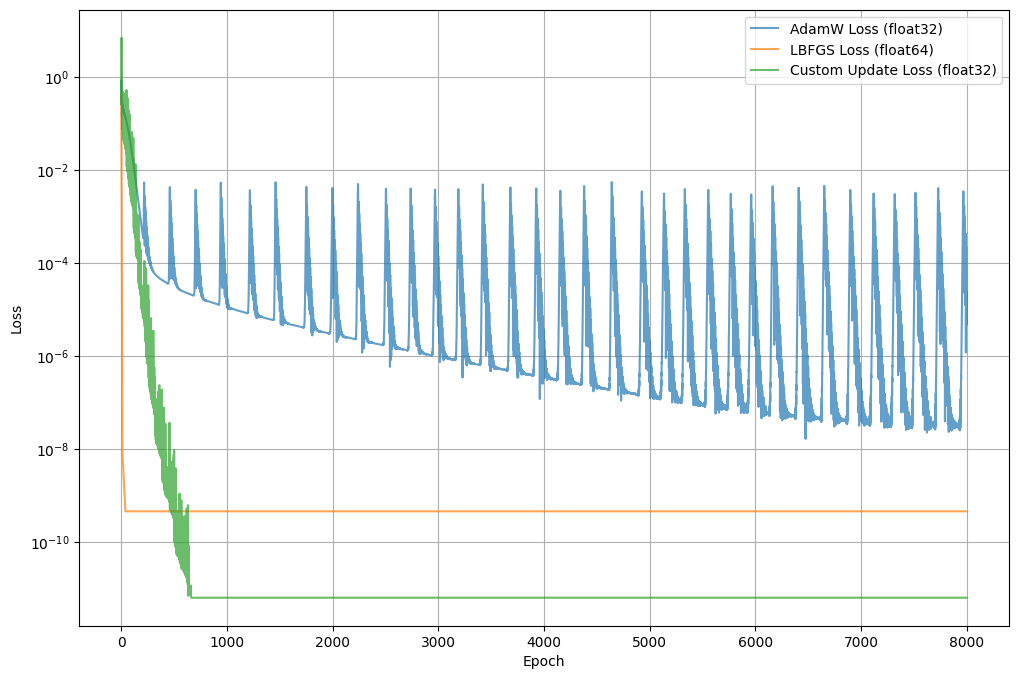

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(adamw_loss_history, label='AdamW Loss (float32)', alpha=0.7)
plt.plot(lbfgs_loss_history, label='LBFGS Loss (float64)', alpha=0.7)
plt.plot(custom_loss_history, label='Custom Update Loss (float32)', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()